In [1]:
##Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, lars_path
from sklearn import svm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, make_scorer, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance
from xgboost.sklearn import XGBRegressor
from sklearn.naive_bayes import GaussianNB

In [2]:
#Data Import
data=pd.read_csv('train_full.csv',index_col=[0])

EDA

In [3]:
data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,...,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,10,65.0,8450,3,3,0,0,5,7,5,...,0,0,0,0,0,1,0,0,0,0
1,5,80.0,9600,3,3,0,0,2,6,8,...,0,0,0,0,0,1,0,0,0,0
2,10,68.0,11250,0,3,0,0,5,7,5,...,0,0,0,0,0,1,0,0,0,0
3,11,60.0,9550,0,3,0,0,5,7,5,...,0,0,0,0,0,0,0,0,0,1
4,10,84.0,14260,0,3,0,0,5,8,5,...,0,0,0,0,0,1,0,0,0,0


In [4]:
#data=data.drop('Custo')

In [5]:
data.shape

(1458, 173)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Columns: 173 entries, MSSubClass to GarageType_Detchd
dtypes: float64(11), int64(162)
memory usage: 1.9 MB


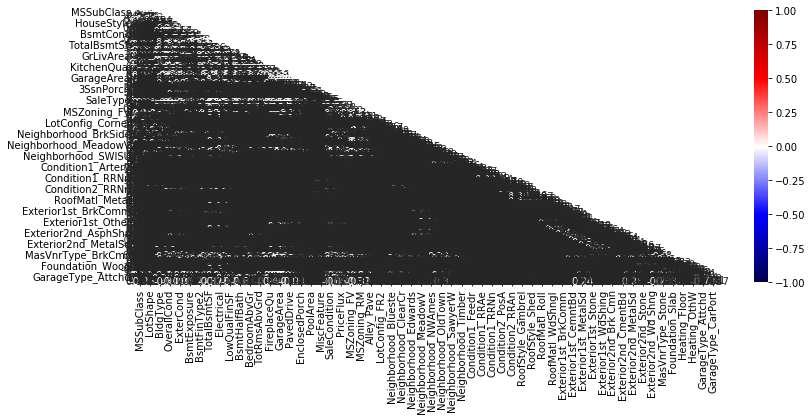

In [9]:
'''mask=np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(13, 5))
sns.heatmap(data.corr(), mask=mask, cmap='seismic', annot=True, vmin=-1, vmax=1,)'''

In [ ]:
#sns.pairplot(data, height=1.2, aspect=1.5)

In [6]:
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'LandSlope', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       ...
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd'],
      dtype='object', length=173)

In [7]:
#The Target column
y=data['SalePrice']
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [8]:
#Remove unnecessary columns for X
X=data.drop(['SalePrice'],axis='columns')
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,...,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,10,65.0,8450,3,3,0,0,5,7,5,...,0,0,0,0,0,1,0,0,0,0
1,5,80.0,9600,3,3,0,0,2,6,8,...,0,0,0,0,0,1,0,0,0,0
2,10,68.0,11250,0,3,0,0,5,7,5,...,0,0,0,0,0,1,0,0,0,0
3,11,60.0,9550,0,3,0,0,5,7,5,...,0,0,0,0,0,0,0,0,0,1
4,10,84.0,14260,0,3,0,0,5,8,5,...,0,0,0,0,0,1,0,0,0,0


In [9]:
#Scale all the numerical columns
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 0.77976316, -0.23136857, -0.20393408, ..., -0.25190738,
        -0.07881104, -0.6011194 ],
       [-0.58867051,  0.46748242, -0.08725172, ..., -0.25190738,
        -0.07881104, -0.6011194 ],
       [ 0.77976316, -0.09159837,  0.08016212, ..., -0.25190738,
        -0.07881104, -0.6011194 ],
       ...,
       [ 1.0534499 , -0.1847785 , -0.14386803, ..., -0.25190738,
        -0.07881104, -0.6011194 ],
       [-0.58867051, -0.09159837, -0.07538055, ..., -0.25190738,
        -0.07881104, -0.6011194 ],
       [-0.58867051,  0.23453209, -0.05305871, ..., -0.25190738,
        -0.07881104, -0.6011194 ]])

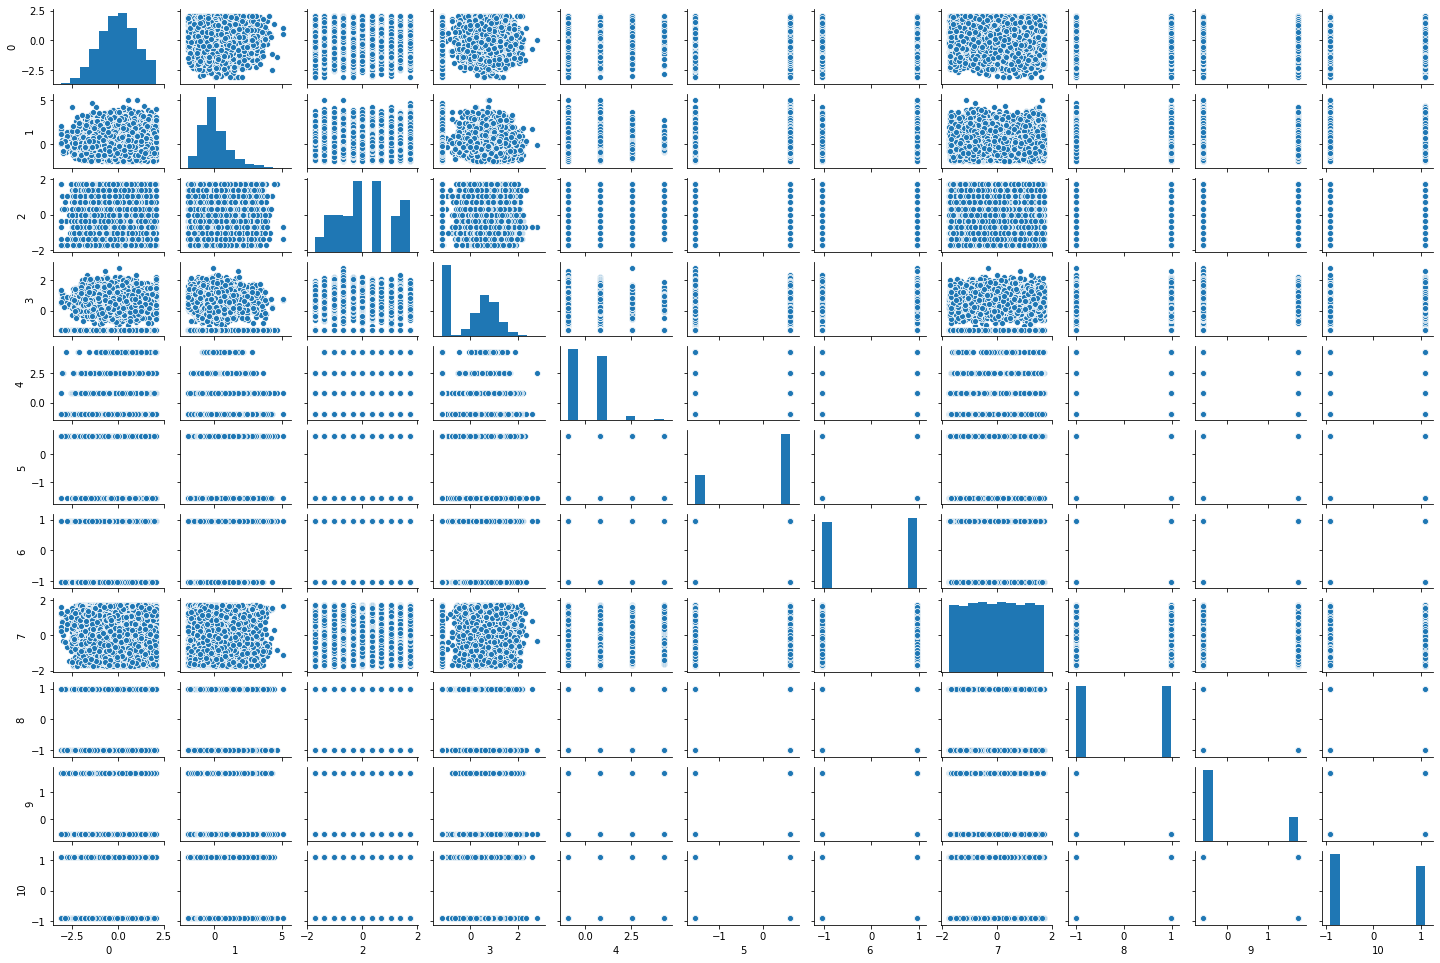

In [15]:
#sns.pairplot(pd.DataFrame(X_scaled), height=1.2, aspect=1.5)

In [10]:
#Train Test Split
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=50)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=50)

In [12]:
#Lasso Path
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_scaled, y.values, method='lasso')

Computing regularization path using the LARS ...


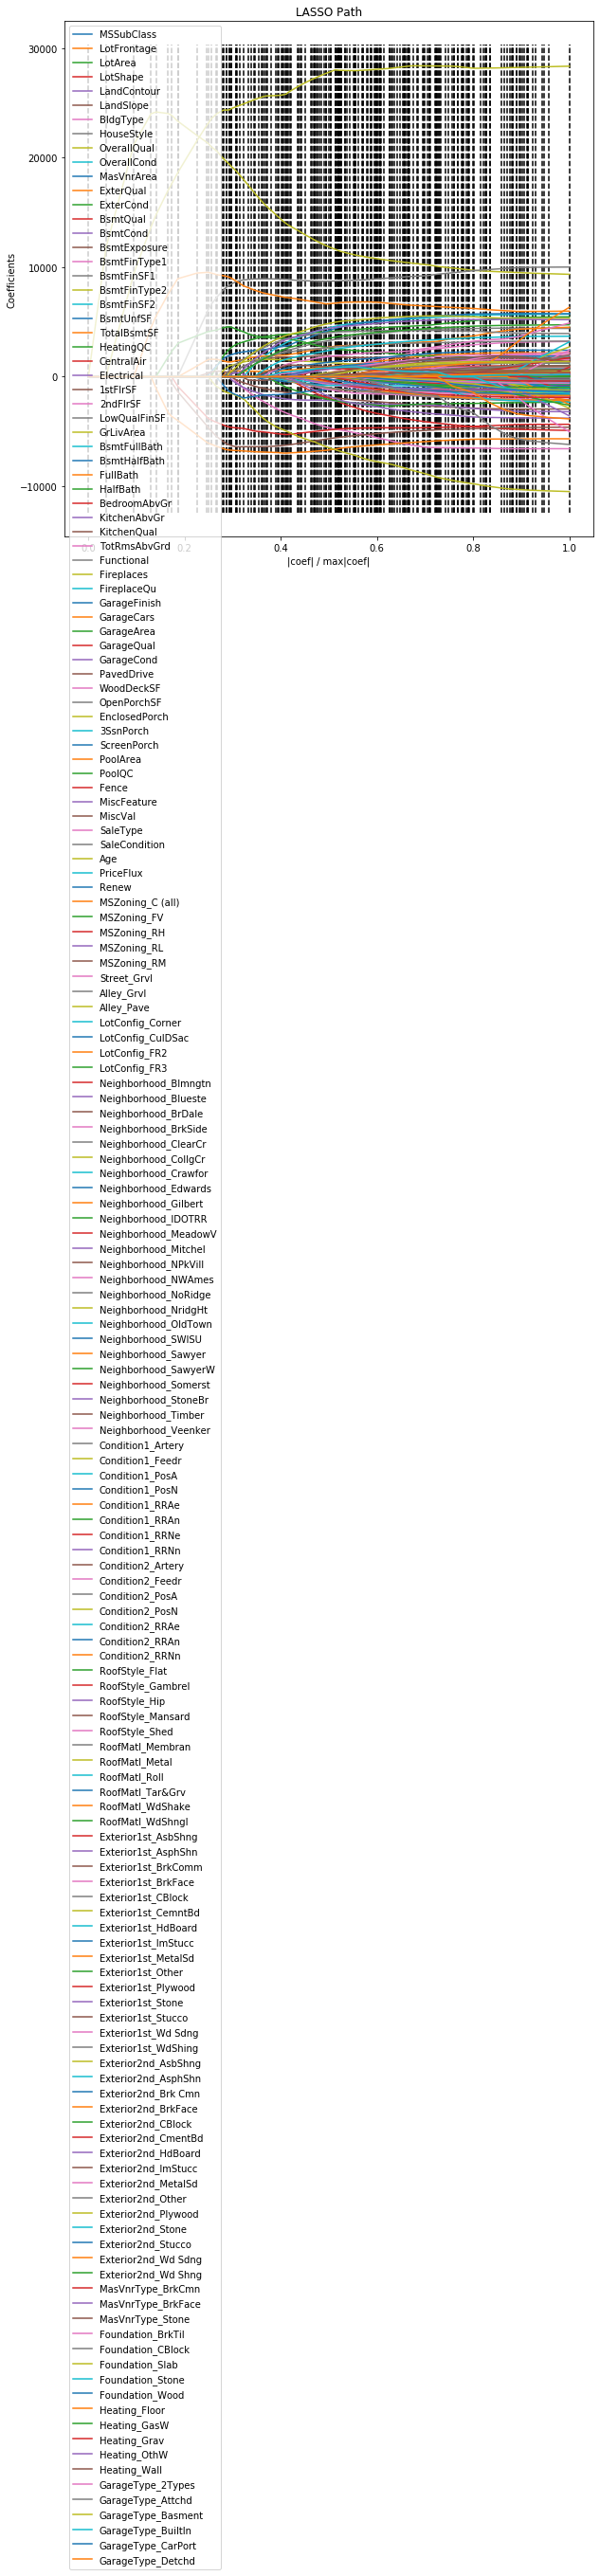

In [25]:
#Plot Lasso Path
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X.columns)
plt.show()

In [13]:
def root_mean_squared_log_error(y_valid, y_preds):
    """Calculate root mean squared error of log(y_true) and log(y_pred)"""
    if len(y_preds)!=len(y_valid): return 'error_mismatch'
    y_preds_new = [math.log(x) for x in y_preds]
    y_valid_new = [math.log(x) for x in y_valid]
    return mean_squared_error(y_valid_new, y_preds_new, squared=False)

In [14]:
#Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_val, y_train_val)
predictionnb=nb.predict(X_test)
print('RMSLE:', root_mean_squared_log_error(y_val, predictionnb))

RMSLE: 0.4902358157415512


In [15]:
#Logistic Regression Model
logit = LogisticRegression(solver= 'liblinear', C=1)
logit.fit(X_train_val, y_train_val)
predictionL = logit.predict(X_test)
confusion_matrix(y_test, predictionL), f1_score(y_test, predictionL), precision_score(y_test, predictionL), recall_score(y_test, predictionL)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
#Logistic GridSearchCV
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
parameters = dict(solver=solver_list)
logit = LogisticRegression(random_state=34, C=1)
f1score=make_scorer(f1_score)
Grid1 = GridSearchCV(logit, parameters, scoring=f1score, cv=5)
Grid1.fit(X_train_val, y_train_val)
Grid1.best_params_, Grid1.best_score_

In [ ]:
Grid1.cv_results_

In [ ]:
scores = Grid1.cv_results_['mean_test_score']

for score, solver, in zip(scores, solver_list):
    print(f"{solver}: {score:.3f}")

In [ ]:
#K Nearest Neighbor model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_val, y_train_val)
predictionKn=knn.predict(X_test)
f1_score(y_test, predictionKn),precision_score(y_test, predictionKn), recall_score(y_test, predictionKn)

In [ ]:
#KNN GridSearchCV
knn_params={
    'n_neighbors':[3,5,7,9,11],
    'weights':['uniform','distance'],
    'algorithm':['ball_tree','kd_tree','brute']
}
knng=GridSearchCV(KNeighborsClassifier(),knn_params,verbose=1,cv=5)
GridK=knng.fit(X_train_val, y_train_val)
predictionKnn=knng.predict(X_test)
f1_score(y_test, predictionKnn), precision_score(y_test, predictionKnn), recall_score(y_test, predictionKnn)

In [ ]:
GridK.best_params_, GridK.best_score_

In [16]:
#Linear SVC Model
sv=svm.LinearSVC()
sv.fit(X_train_val, y_train_val)
predictionSV=sv.predict(X_test)
print('RMSLE:', root_mean_squared_log_error(y_val, predictionSV))

RMSLE: 0.4904139193098274


D:\Users\CHOWKELVIN\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
#SVC Radial Model
svRa=svm.SVC(kernel='rbf', gamma="scale")
svRa.fit(X_train_val, y_train_val)
predictionSVra=svRa.predict(X_test)
print('RMSLE:', root_mean_squared_log_error(y_val, predictionSVra))

RMSLE: 0.43047213710835996


In [18]:
#SVC Poly Model
svPoly=svm.SVC(kernel='poly', degree=4, gamma="scale")
svPoly.fit(X_train_val, y_train_val)
predictionSVpoly=svPoly.predict(X_test)
print('RMSLE:', root_mean_squared_log_error(y_val, predictionSVpoly))

RMSLE: 0.42353026334350796


In [19]:
lm = LinearRegression()
lm.fit(X_train_val, y_train_val)
predictionlm=lm.predict(X_test)
print('RMSLE:', root_mean_squared_log_error(y_val, predictionlm))

RMSLE: 0.6084024174239684


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np

poly = PolynomialFeatures(degree=3) 

X_train_poly = poly.fit_transform(X_train_val)

X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()

lm_poly.fit(X_train_poly, y_train)
predictionlmpoly=lm_poly.predict(X_test)
print('RMSLE:', root_mean_squared_log_error(y_val, predictionlmpoly))

MemoryError: Unable to allocate 7.63 GiB for an array with shape (1166, 877975) and data type float64

In [31]:
# linear models= logistic, naive bayes, linearSVC
# non linear = knn, randomforest, radial svm, XGboost

In [32]:
#Random Forest Model
rand=RandomForestClassifier(n_estimators=300)
rand.fit(X_train_val, y_train_val)
predictionRand=rand.predict(X_test)
confusion_matrix(y_test, predictionRand), f1_score(y_test, predictionRand), precision_score(y_test, predictionRand), recall_score(y_test, predictionRand)

(array([[1533,   65],
        [ 217,  185]], dtype=int64),
 0.5674846625766872,
 0.74,
 0.4601990049751244)

In [33]:
#Random Forest with adjusted threshold
thress=0.39
predictionRandt = (rand.predict_proba(X_test)[:,1] > thress)
print("Threshold of {:6.2f}:".format(thress))
print("Precision: {:6.4f},   Recall: {:6.4f},   F1: {:6.4f}".format(precision_score(y_test, predictionRandt), 
                                                     recall_score(y_test, predictionRandt),f1_score(y_test, predictionRandt)))

Threshold of   0.39:
Precision: 0.6377,   Recall: 0.5473,   F1: 0.5890


In [34]:
confusion_matrix(y_test, predictionRandt)

array([[1473,  125],
       [ 182,  220]], dtype=int64)

In [35]:
#XGBoost Model
xgbr = XGBRegressor(n_estimators=300, learning_rate=0.01)
xgbr.fit(X_train_val, y_train_val)
predictionXgbr=xgbr.predict(X_test)
confusion_matrix(y_test, predictionXgbr.round()), f1_score(y_test, predictionXgbr.round()), precision_score(y_test, predictionXgbr.round()), recall_score(y_test, predictionXgbr.round())

(array([[1541,   57],
        [ 219,  183]], dtype=int64),
 0.5700934579439253,
 0.7625,
 0.4552238805970149)

In [36]:
#XGBoost GridSearchCV
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train_val,
         y_train_val)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   41.0s finished


[21:42:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:42:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
0.3630789489668118
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [37]:
#XGBoost Score
predictionXgbrCV=xgb_grid.predict(X_test)
precision_score(y_test, predictionXgbrCV.round()), recall_score(y_test, predictionXgbrCV.round()), f1_score(y_test, predictionXgbrCV.round())

(0.7478991596638656, 0.4427860696517413, 0.55625)

In [38]:
#Feature Importance with Random Forest
import eli5
from eli5.sklearn import PermutationImportance
perm=PermutationImportance(rand, random_state=1).fit(X_scaled,y)
eli5.show_weights(perm, feature_names=X_num.columns.tolist())

D:\Users\CHOWKELVIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Users\CHOWKELVIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.1516 ± 0.0047,Age
0.1034 ± 0.0012,NumOfProducts
0.0769 ± 0.0025,IsActiveMember
0.0738 ± 0.0043,Balance
0.0475 ± 0.0014,Geography_Germany
0.0460 ± 0.0016,EstimatedSalary
0.0443 ± 0.0014,CreditScore
0.0362 ± 0.0029,Gender_Female
0.0358 ± 0.0035,Tenure
0.0198 ± 0.0020,Geography_France


In [39]:
#Drop Less Importance Feature Columns
X_RF=X_numerical.drop(['Geography_Spain','Gender_Male','HasCrCard','Geography_France','Gender_Female'],axis='columns')
X_scaled_RF=scaler.fit_transform(X_RF)
X_train_val_RF, X_test_RF, y_train_val_RF, y_test_RF = train_test_split(X_scaled_RF, y, test_size=.2, random_state=50)
rand_F=RandomForestClassifier(n_estimators=300)
rand_F.fit(X_train_val_RF, y_train_val_RF)
predictionRand_F=rand_F.predict(X_test_RF)
precision_score(y_test_RF, predictionRand_F), recall_score(y_test_RF, predictionRand_F),f1_score(y_test_RF, predictionRand_F)

(0.7372549019607844, 0.46766169154228854, 0.5722983257229833)

In [40]:
#Default threshold
thress=0.5
predictionRand_F = (rand_F.predict_proba(X_test_RF)[:,1] > thress)
print("Threshold of {:6.2f}:".format(thress))
print("Precision: {:6.4f},   Recall: {:6.4f},   F1: {:6.4f}".format(precision_score(y_test_RF, predictionRand_F), 
                                                     recall_score(y_test_RF, predictionRand_F),f1_score(y_test_RF, predictionRand_F)))

Threshold of   0.50:
Precision: 0.7373,   Recall: 0.4677,   F1: 0.5723


In [41]:
#Optimum threshold
thress=0.33
predictionRand_F = (rand_F.predict_proba(X_test_RF)[:,1] > thress)
print("Threshold of {:6.2f}:".format(thress))
print("Precision: {:6.4f},   Recall: {:6.4f},   F1: {:6.4f}".format(precision_score(y_test_RF, predictionRand_F), 
                                                     recall_score(y_test_RF, predictionRand_F),f1_score(y_test_RF, predictionRand_F)))

Threshold of   0.33:
Precision: 0.5678,   Recall: 0.6045,   F1: 0.5855


In [42]:
confusion_matrix(y_test_RF, predictionRand_F)

array([[1413,  185],
       [ 159,  243]], dtype=int64)